In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
pip install geopandas

     |████████████████████████████████| 921kB 9.7MB/s 
     |████████████████████████████████| 10.1MB 50.2MB/s 
     |████████████████████████████████| 11.8MB 24.1MB/s 


In [0]:
from pathlib import Path
import os
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np

In [4]:
cd /content/drive/My\ Drive/Colab\ Notebooks/Youth_Unemployment

[Errno 2] No such file or directory: '/content/drive/My Drive/Colab Notebooks/Youth_Unemployment'
/content


In [0]:
data_path = Path(r'/content/drive/My Drive/Colab Notebooks/Italy_Unemployment/data')

In [6]:
os.listdir(data_path)

['Unemployment_2004-2019_tassi_provinciale_plus.csv',
 'Demographic_2004-2019_provinciale.csv',
 'Unemployment_with_ra.csv',
 'Ita_spatialdata',
 'Unemployment_2017_merged.csv',
 'Demographic_2001-2017_composition_provinciale.csv',
 'Unemployment_with_ra_demcomp.csv',
 'Demographic_2016-2017_education_regionale.csv',
 'Unemployment_with_ra_demcomp_educat.csv',
 'Survey_2018Oct.sav',
 'cities_model',
 'individual_model',
 'Survey_variable-description.csv',
 'Survey_2018Oct_f.csv',
 'Survey_2018Apr.sav',
 'Survey_2018Jul.sav',
 'Survey_f.csv',
 'Survey_2017Oct.sav',
 'Survey_2018Jan.sav',
 'Survey_2017Jul.sav',
 'json_file.json',
 'pipeline1.joblib']

In [0]:
unemp = os.path.join(data_path, 'Unemployment_with_ra.csv')
unemp_df = pd.read_csv(unemp)

In [8]:
unemp_df.head()

,Unnamed: 0,TL,Territory level and Typology,REG_ID,Region,VAR,Indicator,SEX,Gender,POS,Position,TIME,Year,Unit Code,Unit,PowerCode Code,PowerCode,unemp_n,UNEM_RA_15_MAX,UNEM_RA_15_MAX_SEXDIF,UNEM_RA_15_64,UNEM_RA_15_64_SEXDIF
0,0,2,Large regions (TL2),ITC1,Piedmont,UNEM,Unemployed,T,Total,ALL,All regions,2001,2001,PER,Persons,0,Units,116058.0,5.2,2.5,6.3,2.5
1,1,2,Large regions (TL2),ITC1,Piedmont,UNEM,Unemployed,T,Total,ALL,All regions,2002,2002,PER,Persons,0,Units,120745.0,5.5,2.4,6.5,2.4
2,2,2,Large regions (TL2),ITC1,Piedmont,UNEM,Unemployed,T,Total,ALL,All regions,2003,2003,PER,Persons,0,Units,100956.0,4.8,1.8,5.3,1.7
3,3,2,Large regions (TL2),ITC1,Piedmont,UNEM,Unemployed,T,Total,ALL,All regions,2004,2004,PER,Persons,0,Units,101800.0,5.4,1.7,5.4,1.6
4,4,2,Large regions (TL2),ITC1,Piedmont,UNEM,Unemployed,T,Total,ALL,All regions,2005,2005,PER,Persons,0,Units,89581.0,4.7,1.6,4.8,1.5


##Spatial Data

In [0]:
spatial_data = os.path.join(data_path, 'Ita_spatialdata')

In [10]:
os.listdir(spatial_data)

['ITA_adm0.cpg',
 'ITA_adm0.csv',
 'ITA_adm0.shp',
 'ITA_adm1.csv',
 'ITA_adm0.shx',
 'ITA_adm1.dbf',
 'ITA_adm1.prj',
 'ITA_adm1.cpg',
 'ITA_adm0.dbf',
 'ITA_adm0.prj',
 'ITA_adm2.cpg',
 'ITA_adm1.shp',
 'ITA_adm2.csv',
 'ITA_adm1.shx',
 'ITA_adm2.dbf',
 'ITA_adm2.shp',
 'ITA_adm2.shx',
 'ITA_adm2.prj',
 'ITA_adm3.shx',
 'ITA_adm3.prj',
 'ITA_adm3.cpg',
 'ITA_adm3.dbf',
 'ITA_adm3.csv',
 'license.txt',
 'ITA_adm3.shp',
 'ITA_adm5.shp',
 'ITA_adm5.shx',
 'ITA_adm5.dbf',
 'ITA_adm5.cpg',
 'ITA_adm5.prj',
 'codici_regioni.csv',
 'ita_pop.gri',
 'ita_pop.grd',
 'ita_pop.vrt',
 'ita_pop.csv']

In [11]:
# set the filepath and load in a shapefile
fp = os.path.join(spatial_data, 'ITA_adm5.shp')
map_df = gpd.read_file(fp)
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
0,112,ITA,Italy,1,Abruzzo,1,Chieti,Provincia,Province,None,None,"POLYGON ((14.25403 42.44514, 14.25403 42.44486..."
1,112,ITA,Italy,1,Abruzzo,2,L'Aquila,Provincia,Province,None,Aquila,"POLYGON ((13.40441 42.57731, 13.40542 42.57468..."
2,112,ITA,Italy,1,Abruzzo,3,Pescara,Provincia,Province,None,None,"POLYGON ((14.07483 42.54282, 14.07576 42.54278..."
3,112,ITA,Italy,1,Abruzzo,4,Teramo,Provincia,Province,None,None,"POLYGON ((13.91542 42.89561, 13.91542 42.89542..."
4,112,ITA,Italy,2,Apulia,5,Bari,Provincia,Province,None,None,"MULTIPOLYGON (((17.28370 40.77928, 17.28340 40..."


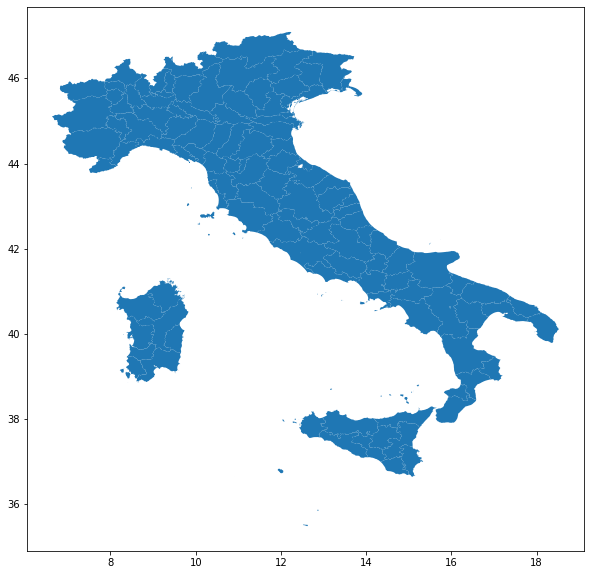

In [12]:
map_df.plot(figsize=(15, 10))

##Adjust Provinces names

In [13]:
map_region_l = map_df['NAME_2'].unique()
print(np.sort(map_region_l))

['Agrigento' 'Alessandria' 'Ancona' 'Aosta Valley' 'Arezzo'
 'Ascoli Piceno' 'Asti' 'Avellino' 'Bari' 'Barletta-Andria-Trani'
 'Belluno' 'Benevento' 'Bergamo' 'Biella' 'Bologna' 'Bolzano-Bozen'
 'Brescia' 'Brindisi' 'Cagliari' 'Caltanissetta' 'Campobasso'
 'Carbonia-Iglesias' 'Caserta' 'Catania' 'Catanzaro' 'Chieti' 'Como'
 'Cosenza' 'Cremona' 'Crotone' 'Cuneo' 'Enna' 'Fermo' 'Ferrara' 'Florence'
 'Foggia' 'Forlì-Cesena' 'Frosinone' 'Genoa' 'Gorizia' 'Grosseto'
 'Imperia' 'Isernia' "L'Aquila" 'La Spezia' 'Latina' 'Lecce' 'Lecco'
 'Livorno' 'Lodi' 'Lucca' 'Macerata' 'Mantua' 'Massa-Carrara' 'Matera'
 'Medio Campidano' 'Messina' 'Milan' 'Modena' 'Monza e della Brianza'
 'Naples' 'Novara' 'Nuoro' 'Ogliastra' 'Olbia-Tempio' 'Oristano' 'Padua'
 'Palermo' 'Parma' 'Pavia' 'Perugia' 'Pesaro e Urbino' 'Pescara'
 'Piacenza' 'Pisa' 'Pistoia' 'Pordenone' 'Potenza' 'Prato' 'Ragusa'
 'Ravenna' "Reggio Nell'Emilia" 'Reggio di Calabria' 'Rieti' 'Rimini'
 'Rome' 'Rovigo' 'Salerno' 'Sassari' 'Savona' 'S

In [14]:
unemp_region_l = unemp_df.loc[unemp_df['Territory level and Typology'] == '  Small regions (TL3) - predominantly rural']['Region'].unique()
unemp_region_l = np.sort(unemp_region_l)
print(unemp_region_l)

['Alessandria' 'Asti' 'Belluno' 'Benevento' 'Bolzano-Bozen' 'Campobasso'
 'Cuneo' 'Foggia' 'Isernia' "L'Aquila" 'Mantua' 'Nuoro' 'Ogliastra'
 'Oristano' 'Potenza' 'Rieti' 'Rovigo' 'Siena' 'Vibo Valentia' 'Viterbo']


In [15]:
for region in unemp_region_l:
  if region in map_region_l:
    print(region, 'Present')
  if region not in map_region_l:
    print(region, 'Not Present')

Alessandria Present
Asti Present
Belluno Present
Benevento Present
Bolzano-Bozen Present
Campobasso Present
Cuneo Present
Foggia Present
Isernia Present
L'Aquila Present
Mantua Present
Nuoro Present
Ogliastra Present
Oristano Present
Potenza Present
Rieti Present
Rovigo Present
Siena Present
Vibo Valentia Present
Viterbo Present


In [0]:
map_df.loc[map_df['NAME_2'] == "Bolzano", 'NAME_2'] = 'Bolzano-Bozen'

In [17]:
spatial_data

'/content/drive/My Drive/Colab Notebooks/Italy_Unemployment/data/Ita_spatialdata'

In [0]:
map_df.to_file(os.path.join(spatial_data, 'ITA_adm5.shp'))

##Mapping

In [19]:
#at the end of calculations check that shpae is still the same
map_df.shape

(110, 12)

In [20]:
unemp_df.columns

Index(['Unnamed: 0', 'TL', 'Territory level and Typology', 'REG_ID', 'Region',
       'VAR', 'Indicator', 'SEX', 'Gender', 'POS', 'Position', 'TIME', 'Year',
       'Unit Code', 'Unit', 'PowerCode Code', 'PowerCode', 'unemp_n',
       'UNEM_RA_15_MAX', 'UNEM_RA_15_MAX_SEXDIF', 'UNEM_RA_15_64',
       'UNEM_RA_15_64_SEXDIF'],
      dtype='object')

In [21]:
unemp_df['Gender'].unique()

array(['Total', 'Females', 'Males'], dtype=object)

We will take the unemp dataframe and merge it together with the map dataframe.We only want specific values from the unemp df, so first thing first we will filtrer it

In [0]:
unemp_df_f= unemp_df.loc[(unemp_df['SEX'] == 'T') 
                         & (unemp_df['Year'] == 2017)
                         & (unemp_df['Gender'] == 'Total')]

In [23]:
unemp_df_f['Year'].unique()

array([2017])

In [24]:
unemp_df_f.columns

Index(['Unnamed: 0', 'TL', 'Territory level and Typology', 'REG_ID', 'Region',
       'VAR', 'Indicator', 'SEX', 'Gender', 'POS', 'Position', 'TIME', 'Year',
       'Unit Code', 'Unit', 'PowerCode Code', 'PowerCode', 'unemp_n',
       'UNEM_RA_15_MAX', 'UNEM_RA_15_MAX_SEXDIF', 'UNEM_RA_15_64',
       'UNEM_RA_15_64_SEXDIF'],
      dtype='object')

In [0]:
merged_df = map_df.merge(unemp_df_f[['Region', 'unemp_n', 'UNEM_RA_15_MAX', 'UNEM_RA_15_MAX_SEXDIF', 'UNEM_RA_15_64', 'UNEM_RA_15_64_SEXDIF']], how='left', left_on=['NAME_2'], right_on=['Region'])                         


In [26]:
merged_df.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry,Region,unemp_n,UNEM_RA_15_MAX,UNEM_RA_15_MAX_SEXDIF,UNEM_RA_15_64,UNEM_RA_15_64_SEXDIF
0,112,ITA,Italy,1,Abruzzo,1,Chieti,Provincia,Province,None,None,"POLYGON ((14.25403 42.44514, 14.25403 42.44486...",Chieti,19892.0,12.0,5.4,12.3,5.3
1,112,ITA,Italy,1,Abruzzo,2,L'Aquila,Provincia,Province,None,Aquila,"POLYGON ((13.40441 42.57731, 13.40542 42.57468...",L'Aquila,15884.0,12.3,4.8,12.6,5.0
2,112,ITA,Italy,1,Abruzzo,3,Pescara,Provincia,Province,None,None,"POLYGON ((14.07483 42.54282, 14.07576 42.54278...",Pescara,16121.0,12.3,4.2,12.5,4.2
3,112,ITA,Italy,1,Abruzzo,4,Teramo,Provincia,Province,None,None,"POLYGON ((13.91542 42.89561, 13.91542 42.89542...",Teramo,13229.0,10.2,3.4,10.5,3.3
4,112,ITA,Italy,2,Apulia,5,Bari,Provincia,Province,None,None,"MULTIPOLYGON (((17.28370 40.77928, 17.28340 40...",Bari,76077.0,15.4,6.3,15.7,6.2


/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


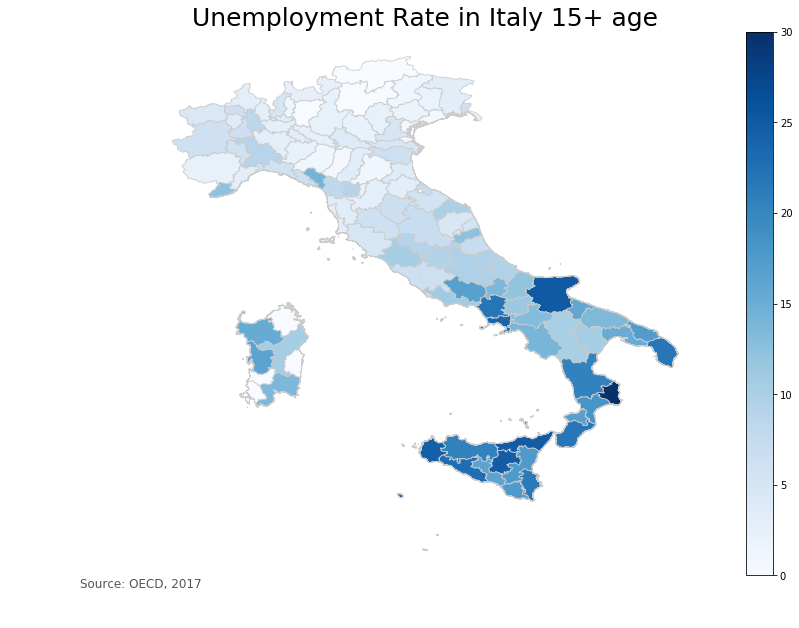

In [27]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'UNEM_RA_15_MAX'
# set the range for the choropleth
vmin, vmax = 0, 30
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(15, 10))
# remove the axis
ax.axis('off')
# add a title
ax.set_title('Unemployment Rate in Italy 15+ age', fontdict={'fontsize': 25, 'fontweight' : '3'})
# create an annotation for the data source
ax.annotate('Source: OECD, 2017',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)

merged_df.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

In [0]:
assets_path=Path(r'/content/drive/My Drive/Colab Notebooks/Italy_Unemployment/assets')
fig.savefig(os.path.join(assets_path, 'unemp_ra_15+.png'), dpi=300)

/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


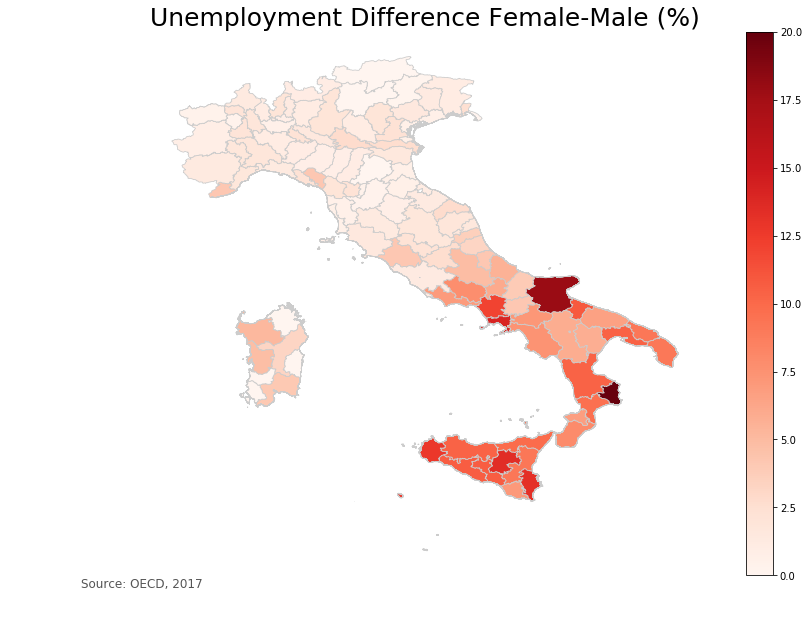

In [29]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'UNEM_RA_15_MAX_SEXDIF'
# set the range for the choropleth
vmin, vmax = 0, 20
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(15, 10))
# remove the axis
ax.axis('off')
# add a title
ax.set_title('Unemployment Difference Female-Male (%)', fontdict={'fontsize': 25, 'fontweight' : '3'})
# create an annotation for the data source
ax.annotate('Source: OECD, 2017',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)

merged_df.plot(column=variable, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8')

In [0]:
fig.savefig(os.path.join(assets_path, 'unemp_sexdiff_15+.png'), dpi=300)

In [31]:
merged_df.sort_values('UNEM_RA_15_MAX_SEXDIF', ascending=False)

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry,Region,unemp_n,UNEM_RA_15_MAX,UNEM_RA_15_MAX_SEXDIF,UNEM_RA_15_64,UNEM_RA_15_64_SEXDIF
14,112,ITA,Italy,4,Calabria,15,Crotone,Provincia,Province,None,None,"POLYGON ((17.02403 39.48284, 17.02403 39.48264...",Crotone,19037.0,29.0,17.8,29.7,18.0
7,112,ITA,Italy,2,Apulia,8,Foggia,Provincia,Province,None,None,"MULTIPOLYGON (((16.18764 41.84514, 16.18764 41...",Foggia,53088.0,25.0,16.0,25.4,16.0
20,112,ITA,Italy,5,Campania,21,Naples,Provincia,Province,None,Napels|Nápoles|Neapel,"MULTIPOLYGON (((14.25264 40.54153, 14.25264 40...",Naples,262900.0,23.9,12.7,24.3,12.8
82,112,ITA,Italy,15,Sicily,83,Enna,Provincia,Province,None,None,"MULTIPOLYGON (((14.10139 37.53857, 14.10042 37...",Enna,15010.0,24.7,12.2,25.1,12.5
86,112,ITA,Italy,15,Sicily,87,Siracusa,Provincia,Province,None,Siracusa|Syrakus,"MULTIPOLYGON (((15.14903 36.68431, 15.14903 36...",Siracusa,31709.0,22.0,12.0,22.3,12.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,112,ITA,Italy,14,Sardegna,74,Medio Campidano,Provincia,Province,None,None,"POLYGON ((8.96790 39.77814, 8.96841 39.77813, ...",NaN,NaN,NaN,NaN,NaN,NaN
75,112,ITA,Italy,14,Sardegna,76,Ogliastra,Provincia,Province,None,None,"MULTIPOLYGON (((9.70347 39.97542, 9.70347 39.9...",NaN,NaN,NaN,NaN,NaN,NaN
76,112,ITA,Italy,14,Sardegna,77,Olbia-Tempio,Provincia,Province,None,None,"MULTIPOLYGON (((9.77875 40.87514, 9.77875 40.8...",NaN,NaN,NaN,NaN,NaN,NaN
98,112,ITA,Italy,17,Trentino-Alto Adige,99,Bolzano-Bozen,Provincia,Province,None,Bozen|Südtirol|Alto Adige,"POLYGON ((12.23343 47.08520, 12.23950 47.07824...",Bolzano-Bozen,7967.0,NaN,NaN,3.1,0.7


##Export DS for modelling

In [32]:
data_path

PosixPath('/content/drive/My Drive/Colab Notebooks/Italy_Unemployment/data')

In [0]:
save_path = os.path.join(data_path, 'Unemployment_2017_merged.csv')
merged_df.to_csv(save_path)